In [789]:
import numpy as np
import pandas as pd

In [790]:
salary_df = pd.read_csv("Salary Data.csv")
salary_df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,NaN,Male,NaN,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,NaN,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,NaN,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [791]:
salary_df.isnull().sum()

Age                    8
Gender                 2
Education Level        8
Job Title              2
Years of Experience    7
Salary                 2
dtype: int64

In [792]:
salary_df = salary_df.dropna(subset=['Salary'])
salary_df.isnull().sum()

Age                    6
Gender                 0
Education Level        6
Job Title              0
Years of Experience    5
Salary                 0
dtype: int64

In [793]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  367 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      367 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  368 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [794]:
salary_df.describe()

,Age,Years of Experience,Salary
count,367.000000,368.000000,373.000000
mean,37.400545,10.009511,100577.345845
std,7.002755,6.566411,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


<Axes: ylabel='Years of Experience'>

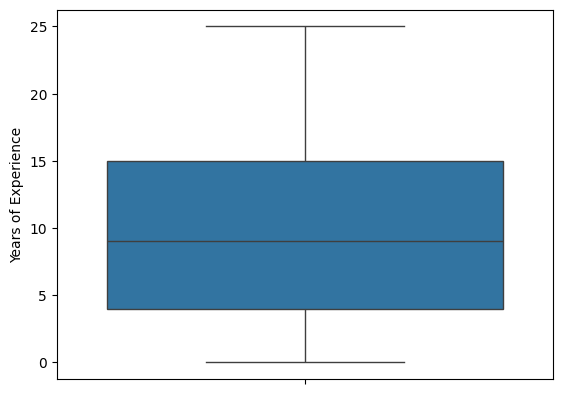

In [795]:
import seaborn as sns   
sns.boxplot(salary_df , 
            y= salary_df["Years of Experience"])

<Axes: ylabel='Age'>

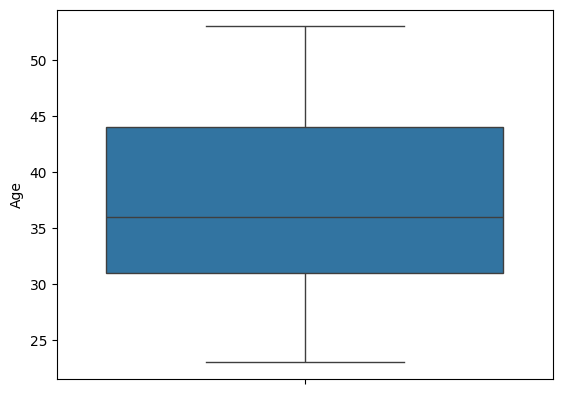

In [796]:
sns.boxplot(salary_df , 
            y= salary_df["Age"])

<Axes: ylabel='Salary'>

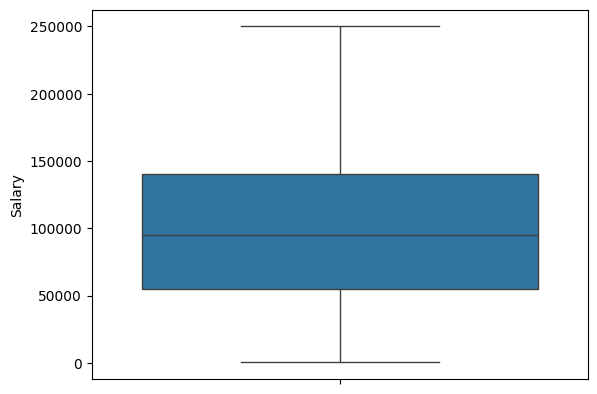

In [797]:
sns.boxplot(salary_df , 
            y= salary_df["Salary"])

In [798]:
from sklearn.impute import SimpleImputer

In [799]:
imputer = SimpleImputer(missing_values=np.nan , strategy='median')
columns_to_impute = ['Age', 'Years of Experience']

salary_df[columns_to_impute] = imputer.fit_transform(salary_df[columns_to_impute])

salary_df
# imputer.fit(x[:,[0,4]])
# x[:,[0,4]] = imputer.transform(x[:,[0,4]])
# x

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_12712\3074795490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df[columns_to_impute] = imputer.fit_transform(salary_df[columns_to_impute])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,36.0,Male,NaN,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,NaN,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,9.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [800]:
salary_df.isnull().sum()


Age                    0
Gender                 0
Education Level        6
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [801]:
salary_df['Education Level'] = salary_df['Education Level'].fillna(salary_df['Education Level'].mode()[0])
salary_df.isnull().sum()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_12712\3380619617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Education Level'] = salary_df['Education Level'].fillna(salary_df['Education Level'].mode()[0])


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [802]:
salary_df = salary_df.drop(columns=["Gender"])
salary_df.columns

Index(['Age', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'], dtype='object')

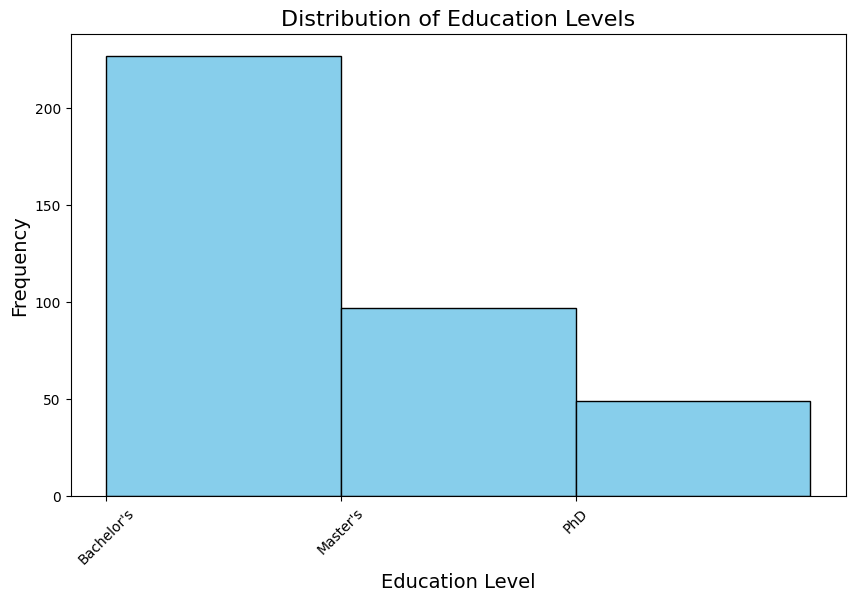

In [803]:
import matplotlib.pyplot as plt

# Enhanced histogram
plt.figure(figsize=(10, 6))
plt.hist(
    salary_df["Education Level"], 
    bins=range(0, len(salary_df["Education Level"].unique()) + 1),
    color='skyblue', 
    edgecolor='black'
)
plt.title("Distribution of Education Levels", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(ticks=range(0, len(salary_df["Education Level"].unique())), labels=salary_df["Education Level"].unique(), rotation=45)

plt.show()


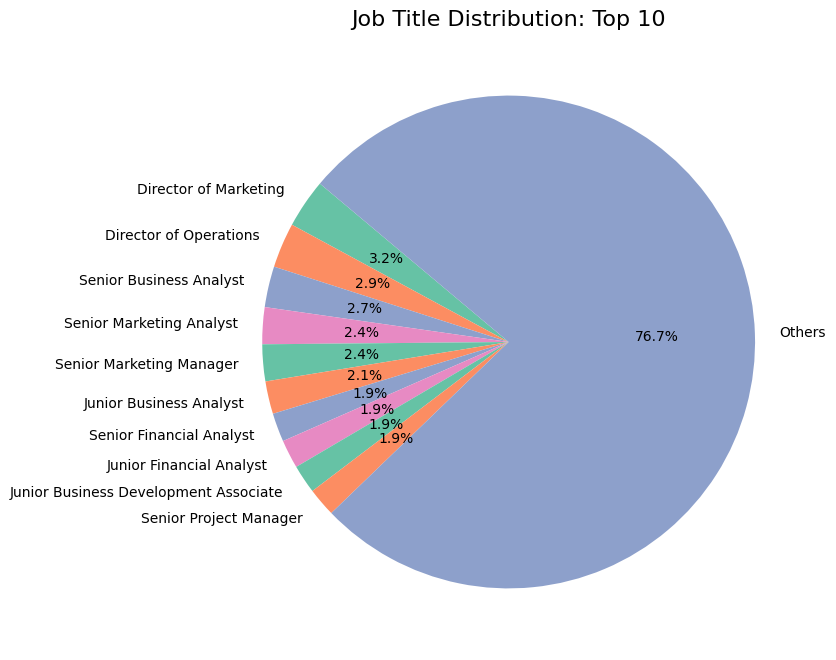

In [804]:
job_counts = salary_df["Job Title"].value_counts()

top_10 = job_counts[:10]
others = pd.Series({"Others": job_counts[10:].sum()})
data = pd.concat([top_10, others])

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    data, 
    labels=data.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)

plt.title("Job Title Distribution: Top 10", fontsize=16)
plt.show()


In [805]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(
#     transformers=[
#         ('encoder', OneHotEncoder(), ['Education Level', 'Job Title'])
#     ],
#     remainder='passthrough' 
# )
# x = salary_df.drop(columns=['Salary']) 
# y = salary_df['Salary']
# x = ct.fit_transform(x)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
job_encoder = LabelEncoder()


In [806]:
salary_df["Job Title"] = job_encoder.fit_transform(salary_df["Job Title"])

In [807]:
salary_df["Education Level"] = label_encoder.fit_transform(salary_df["Education Level"])

In [808]:
salary_df.head()

,Age,Education Level,Job Title,Years of Experience,Salary
0,36.0,0,159,5.0,90000.0
1,28.0,1,17,3.0,65000.0
2,45.0,0,130,15.0,150000.0
3,36.0,0,101,9.0,60000.0
4,52.0,1,22,20.0,200000.0


In [809]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
salary_df["Age_scaled"] = st.fit_transform(salary_df[["Age"]])

salary_df["Years of Experience_scaled"] = st.fit_transform(salary_df[["Years of Experience"]])

In [810]:
salary_df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Age_scaled,Years of Experience_scaled
0,36.0,0,159,5.0,90000.0,-0.198591,-0.766911
1,28.0,1,17,3.0,65000.0,-1.351499,-1.073922
2,45.0,0,130,15.0,150000.0,1.098431,0.768146
3,36.0,0,101,9.0,60000.0,-0.198591,-0.152888
4,52.0,1,22,20.0,200000.0,2.107226,1.535674


In [811]:
X = salary_df[["Education Level" , "Job Title" , "Age_scaled" ,"Years of Experience_scaled"]]
Y = salary_df["Salary"]
X.head()

,Education Level,Job Title,Age_scaled,Years of Experience_scaled
0,0,159,-0.198591,-0.766911
1,1,17,-1.351499,-1.073922
2,0,130,1.098431,0.768146
3,0,101,-0.198591,-0.152888
4,1,22,2.107226,1.535674


In [812]:
Y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [813]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_predict = regressor.predict(x_test)


In [814]:
#Mean Square Error
from sklearn.metrics import mean_squared_error , mean_absolute_error
import math
mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
print(f"Mean Square Error: {round(mse , 2)}")
print(f"Mean Error: {round(mae , 2)}")


Mean Square Error: 295561512.53
Mean Error: 11676.92


In [815]:
# calc R2
from sklearn.metrics import  r2_score
acc = r2_score(y_test , y_predict)
print(f"R2: {round(acc , 4)*100}%")

R2: 87.67%


In [816]:
x_test.head()

,Education Level,Job Title,Age_scaled,Years of Experience_scaled
329,1,29,1.530772,1.689179
33,0,84,0.233750,0.000617
15,0,89,0.954318,0.921651
316,1,117,-0.486818,-0.613405
57,2,116,0.810204,1.075157


In [817]:
Age = 28
Degree = "Master's" 
job_title = "Data Analyst"
exp = 3


In [818]:
degree_encoded = label_encoder.transform([Degree])[0]  
job_title_encoded = job_encoder.transform([job_title])[0]  

scaled_age = st.transform([[Age]])[0][0]  
scaled_exp = st.transform([[exp]])[0][0]  

input_data = pd.DataFrame({
    'Education Level': [degree_encoded],
    'Job Title': [job_title_encoded],
    'Age_scaled': [scaled_age],
    'Years of Experience_scaled': [scaled_exp]
})

emp_salary = regressor.predict(input_data)
print(f"Employee salary is: {emp_salary}")

# emp_salary = regressor.predict([[Degree, job_title, Age[0][0], exp[0][0]]])
# print(emp_salary)

Employee salary is: [95402.3322238]


c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


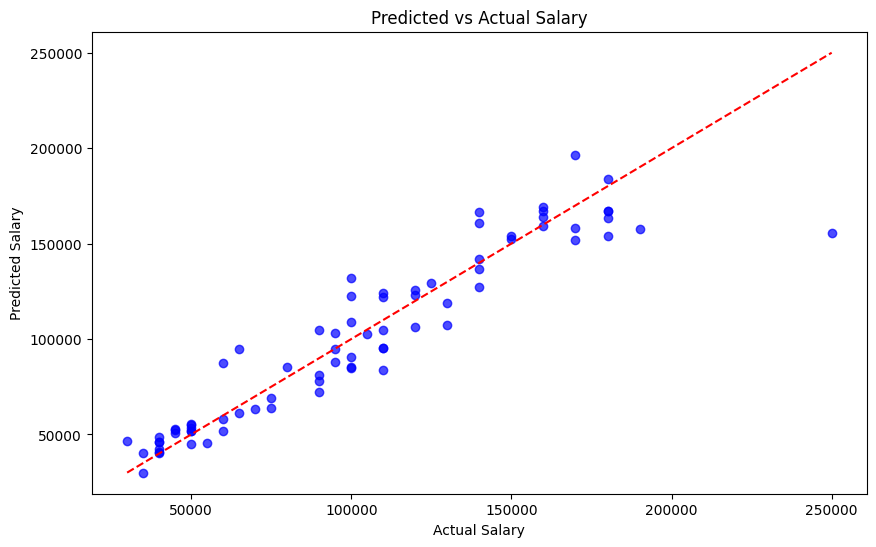

In [822]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

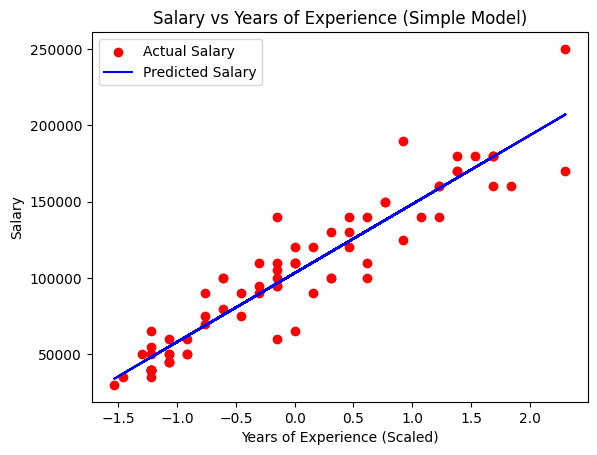

In [823]:
X_simple = x_test[["Years of Experience_scaled"]]
regressor.fit(X_simple, y_test)
y_simple_predict = regressor.predict(X_simple)

plt.scatter(x_test["Years of Experience_scaled"], y_test, color="red", label="Actual Salary")
plt.plot(x_test["Years of Experience_scaled"], y_simple_predict, color="blue", label="Predicted Salary")
plt.xlabel("Years of Experience (Scaled)")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience (Simple Model)")
plt.legend()
plt.show()


In [824]:
yearsOfExp = st.transform([[10]])
employee_salary = regressor.predict([[yearsOfExp[0][0]]])
print(employee_salary)

[103296.94702705]


c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
